# Multiple Linear Regression
## Bike-sharing Case study

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Importing important libraries & modules

In [141]:
import pandas as pd
import numpy as np
import statsmodels
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
np.random.seed(0)
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

## Reading and Understanding the Data

In [106]:
#Importing the bike-sharing dataset using pandas 
bikes = pd.read_csv(r'C:\Users\anmol\Downloads\day.csv')

### Checking table statistics, null values & missing data

In [107]:
bikes.shape

(730, 16)

In [108]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [28]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [31]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping irrelevant columns :-
- Instant : Index field of not any value to the model
- Dteday : Time Grain data already available in other columns
- Casual & Registered : Cnt is our target variable so these columns become redundant.

In [109]:
bikes=bikes.drop(columns=['instant','dteday','casual','registered'])

In [110]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Preparation - part 1
#### Identifying Categorical & Continuous variables
#### According to the data dictionary :-
- Binary Variables :- 'Yr', 'Holiday' , 'Workingday'
- Categorical Variables :- 'Month', 'Weekday', 'Weathersit'
- Continuous Variables :- 'Temp', 'Atemp', 'Hum', 'Windspeed'
- Target Variable :- 'Cnt'

No Changes required in Binary, continuous & target variables.

#### Assigning string values to categorical variables

In [111]:
#Assigning month values
bikes["mnth"].replace({1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'}, inplace=True)
#Assigning Weekday values
bikes["weekday"].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}, inplace=True)
#Assigning Weathersit values
bikes["weathersit"].replace({1: "Clear_Cloudy", 2: "Mist_Cloudy", 3: "L_Snow_Rain", 4: "H_Snow_Rain", }, inplace=True)
#Assigning Season values
bikes["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True)

In [112]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear_Cloudy,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualisation & EDA

### Histogram
Distribution of **Target** Variable

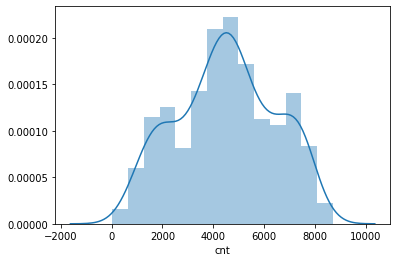

In [113]:
sns.distplot(bikes['cnt'])
plt.show()

Observed a Normal Bell curved distribution.

### Pair Plots

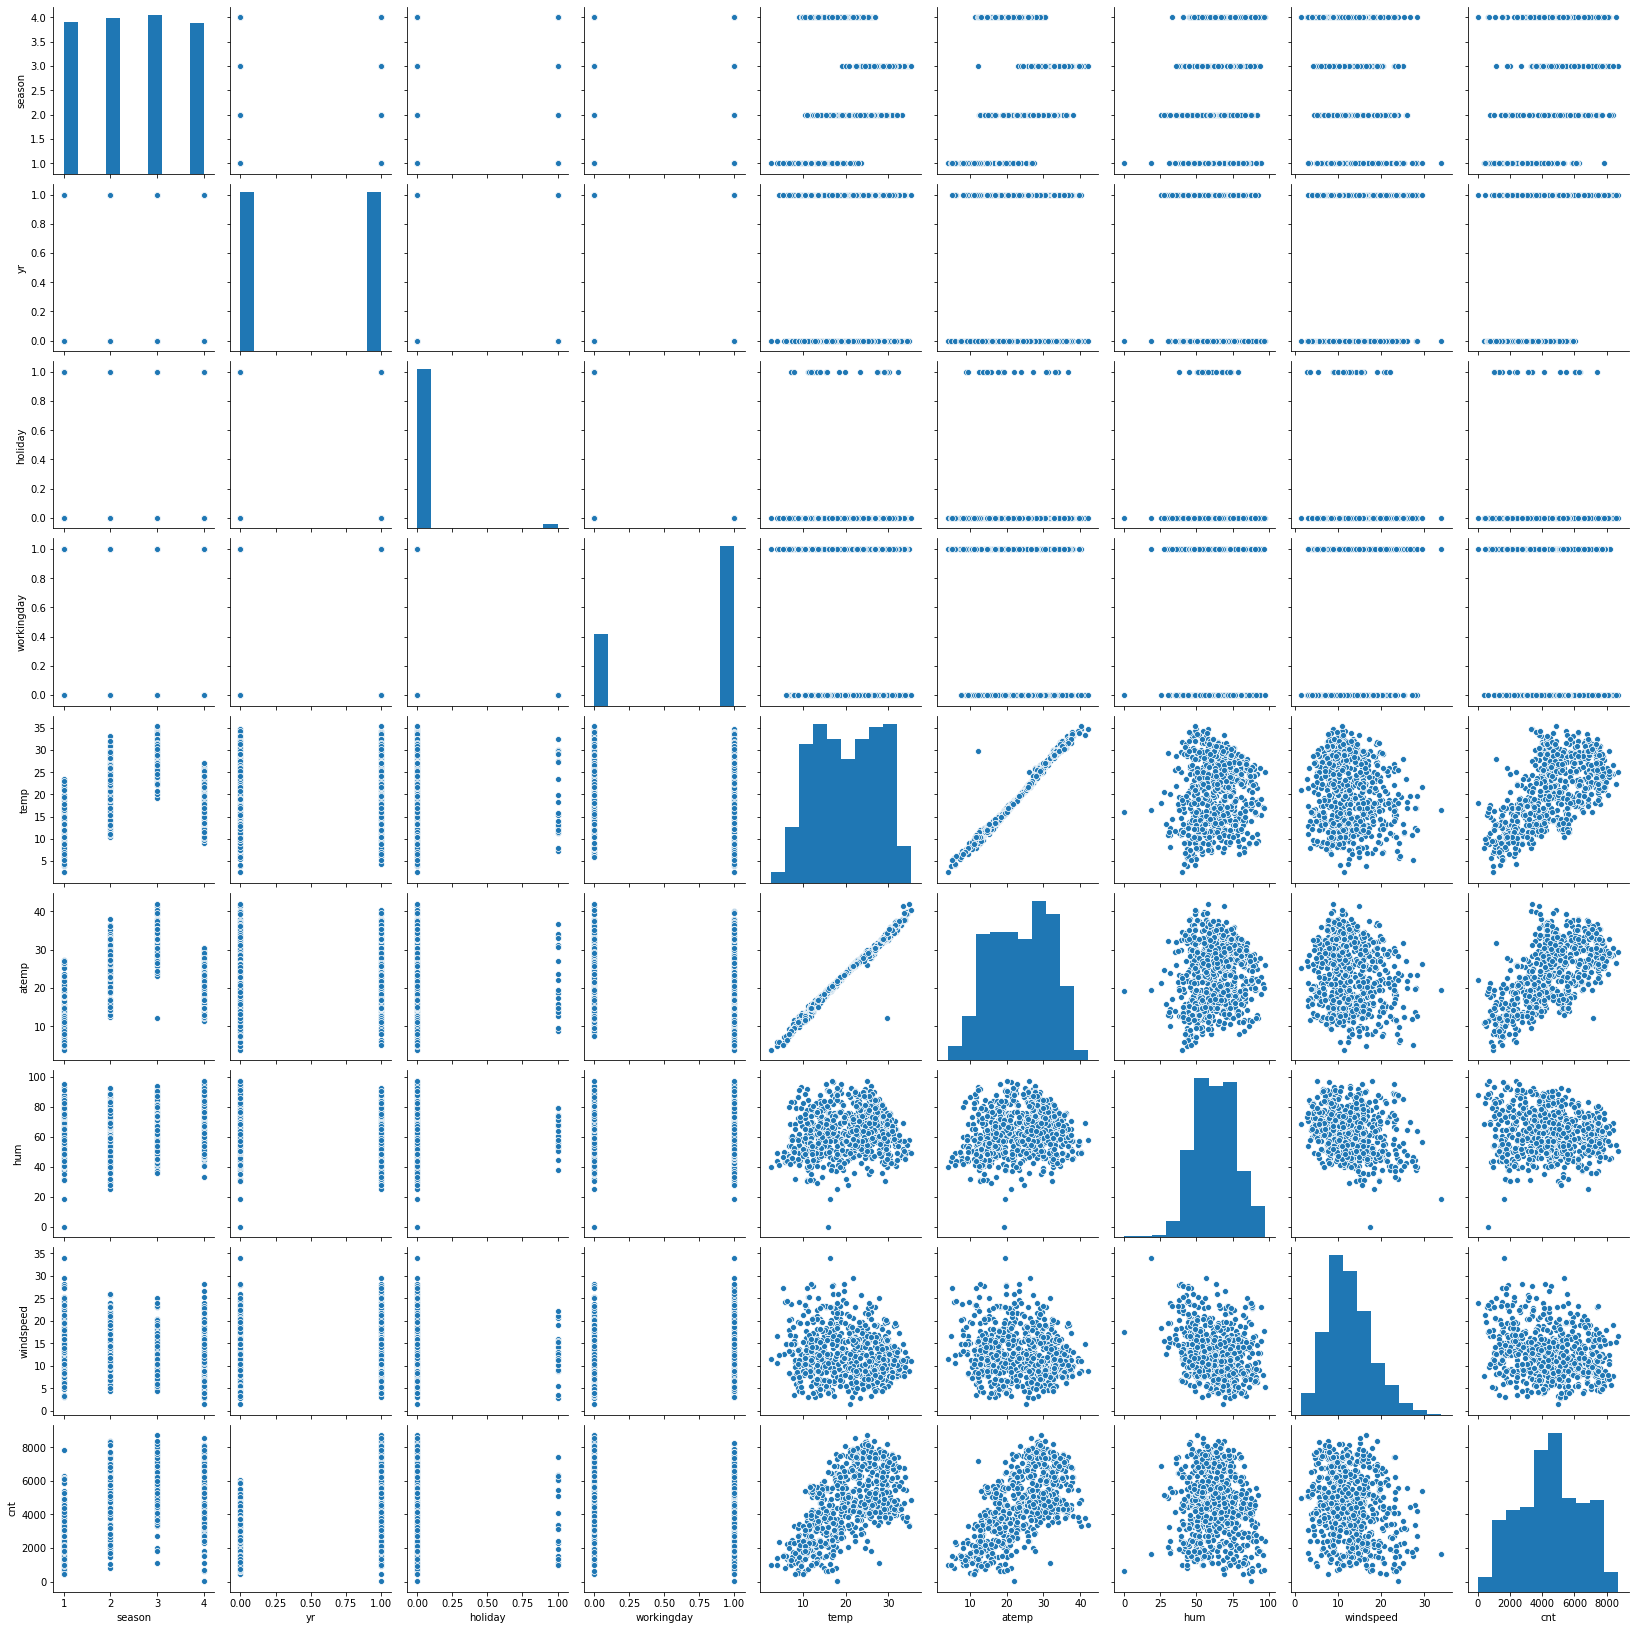

In [51]:
sns.pairplot(bikes)
plt.show()

#### Observed a correlation in Temp & Atemp. Will verify this using Heatmaps & Correlation Matrix,

### Correlation Matrix

In [114]:
bikes_cor=bikes.corr()
bikes_cor

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


### Heatmap

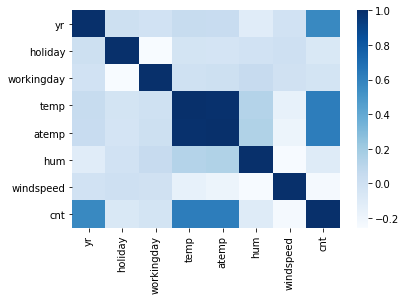

In [115]:
sns.heatmap(bikes_cor,cmap="Blues")
plt.show()

***Observation*** - As suspected, Temp & Atemp columns have very high correlation and one of them needs to be dropped from the data set.

In [116]:
#Dropping temp column
bikes=bikes.drop(['temp'],axis=1)

### Box Plots

In [117]:
#Categorical variables segregation
bikes_categorical = bikes.select_dtypes(exclude=['float64','datetime64','int64'])
bikes_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

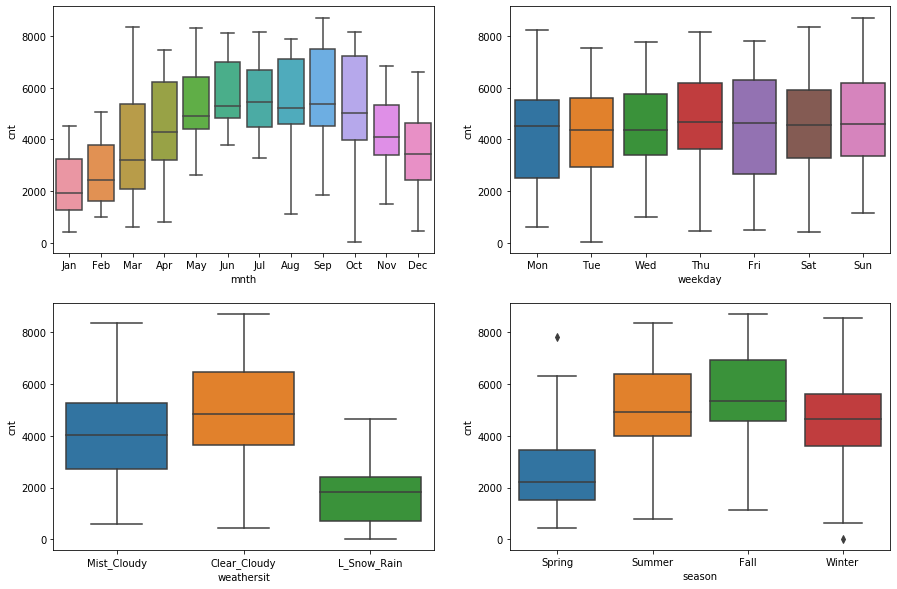

In [121]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='mnth', y='cnt', data=bikes)
plt.subplot(2,2,2)
sns.boxplot(x='weekday', y='cnt', data=bikes)
plt.subplot(2,2,3)
sns.boxplot(x='weathersit', y='cnt', data=bikes)
plt.subplot(2,2,4)
sns.boxplot(x='season', y='cnt', data=bikes)
plt.show()

***Observations*** - Data shows higher services availed on Clear sky & Less Cloudy days. Bike rentals were relatively higher in the months June through September, i.e. Fall season

### Data Preparation - part 2
#### Dummy Variables - Categorical Variables

In [123]:
#Creating dummy variables for column 'mnth'
months = pd.get_dummies(bikes['mnth'], drop_first = True)

#Creating dummy variables for column 'weekday'
weekdays = pd.get_dummies(bikes['weekday'], drop_first = True)

#Creating dummy variables for column 'weathersit'
weather = pd.get_dummies(bikes['weathersit'], drop_first = True)

#Creating dummy variables for column 'season'
season = pd.get_dummies(bikes['season'], drop_first = True)

In [124]:
#Concatenating dummy variables in the bikes dataset
bikes = pd.concat([bikes, months], axis = 1)
bikes = pd.concat([bikes, weekdays], axis = 1)
bikes = pd.concat([bikes, weather], axis = 1)
bikes = pd.concat([bikes, season], axis = 1)

In [125]:
#Dropping categorical variables after creation of dummy variables
bikes = bikes.drop(['mnth','weathersit','weekday','season'],axis=1)

In [126]:
bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,L_Snow_Rain,Mist_Cloudy,Spring,Summer,Winter
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting the data into Training & Test set

In [127]:
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling the Features 

In [128]:
# Performing Min-Max Scaling

#Defining scaler object
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the boolean and dummy variables
num_vars = ['cnt', 'atemp', 'hum', 'windspeed']

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])

In [129]:
bikes_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,L_Snow_Rain,Mist_Cloudy,Spring,Summer,Winter
367,1,0,1,0.061963,0.454701,0.695175,0.254717,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
648,1,0,1,0.462175,0.477458,0.299450,0.868385,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
44,0,0,1,0.419099,0.387290,0.807474,0.217556,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
705,1,0,0,0.318824,0.787463,0.189819,0.573631,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
379,1,0,1,0.108365,0.431945,0.449210,0.263346,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [130]:
pd.set_option("display.max_columns",None)
bikes_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,L_Snow_Rain,Mist_Cloudy,Spring,Summer,Winter
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.513175,0.649499,0.319463,0.515792,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.027397,0.342466,0.251712,0.246575,0.250000
std,0.500241,0.163378,0.446377,0.211663,0.144219,0.168114,0.225336,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.163378,0.474941,0.434369,0.431387,0.433384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.690521,0.752361,0.410413,0.691872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and y sets for the model building

In [131]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

## Data Modelling
We will perform this step using a misture of two methods:-
1. **Automatic RFE (recursive feature elimination)**
2. **Manual feature selection.**

### RFE (Recursive Feature Elimination)

In [136]:
# Initialising models for RFE & fitting on the train dataset
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
# Printing top 15 variables ('True') selected by RFE model
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 10),
 ('Jun', False, 4),
 ('Mar', False, 13),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 6),
 ('Sun', False, 7),
 ('Thu', False, 14),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('L_Snow_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [138]:
#Columns to keep
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Aug', 'Dec', 'Jan',
       'Nov', 'Sep', 'L_Snow_Rain', 'Mist_Cloudy', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

In [140]:
#Columns to drop
X_train.columns[~rfe.support_]

Index(['workingday', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Manual Feature Selection
#### Building model using statsmodel, for the detailed statistics

In [144]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [142]:
#Custom Function to build & rebuild the model iteratively and return summary statistics

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
#Custom function to check the VIF (Variance Inflation Factor)

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Running the model on RFE variables dataset

In [154]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     206.3
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.29e-218
Time:                        02:23:28   Log-Likelihood:                 586.32
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     568   BIC:                            -1071.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3091      0.035      8.955      

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Using custom function to get VIF
checkVIF(X_train_new)

,Features,VIF
0,const,86.10
13,Spring,5.67
3,atemp,4.03
15,Winter,3.87
14,Summer,3.08
4,hum,1.97
9,Nov,1.68
6,Aug,1.67
8,Jan,1.64
12,Mist_Cloudy,1.60


***Observations*** :-
   - 'Spring' has a very high VIF and needs to be dropped.
   - We need to rebuild the model after dropping 'Spring'

In [158]:
#Dropping the 'Spring' column due to high VIF
X_train_new = X_train_new.drop(['Spring'],axis=1)
#Building the model ith updated train dataset
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     217.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          8.23e-218
Time:                        02:24:12   Log-Likelihood:                 582.20
No. Observations:                 584   AIC:                            -1134.
Df Residuals:                     569   BIC:                            -1069.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2488      0.027      9.088      

In [159]:
#Checking VIF again on the new model
checkVIF(X_train_new)

,Features,VIF
0,const,53.48
3,atemp,2.13
14,Winter,1.95
4,hum,1.94
8,Jan,1.63
9,Nov,1.61
12,Mist_Cloudy,1.60
13,Summer,1.52
7,Dec,1.44
6,Aug,1.40


***Observations***
- The VIFs and p-values both are within an acceptable range.

## Residual Analysis of the train data

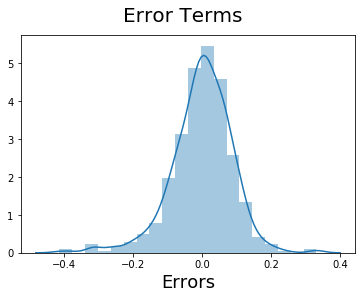

In [161]:
# Predeciting the 'Cnt' variable 
lm = sm.OLS(y_train,X_train_new).fit()
y_train_cnt = lm.predict(X_train_new)
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Evaluating the model
### Making Predictions on the test set

#### Applying the scaling on the test sets

In [163]:
# Apply scaler() to all the columns except the boolean and dummy variables
num_vars = ['cnt', 'atemp', 'hum', 'windspeed']

bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

#### Dividing into X_test and y_test

In [164]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [166]:
# Dropping the columns from X test data set
X_train_new= X_train_new.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns]

In [167]:
# Predicting the 'Cnt' variable in Test set
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

In [173]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     217.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          8.23e-218
Time:                        03:03:02   Log-Likelihood:                 582.20
No. Observations:                 584   AIC:                            -1134.
Df Residuals:                     569   BIC:                            -1069.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2488      0.027      9.088      0.000       0.195       0.303
yr              0.2274      0.008     29.935      0.000       0.212       0.242
holiday        -0.0908      0.023     -3.903      0.000      -0.136      -0.045
atemp           0.5372      0.026     20.799      0.000       0.486       0.588
hum            -0.1679      0.036     -4.640      0.000      -0.239      -0.097
windspeed      -0.1695      0.024     -6.934      0.000      -0.217      -0.121
Aug             0.0637      0.015      4.131      0.000       0.033       0.094
Dec            -0.0433      0.016     -2.723      0.007      -0.075      -0.012
Jan            -0.0469      0.017     -2.766      0.006      -0.080      -0.014
Nov            -0.0464      0.017     -2.653      0.008      -0.081      -0.012
Sep             0.1094      0.015      7.174      0.000       0.079       0.139
L_Snow_Rain    -0.2391      0.026     -9.323      0.000      -0.289      -0.189
Mist_Cloudy    -0.0540      0.010     -5.424      0.000      -0.074      -0.034
Summer          0.0937      0.011      8.759      0.000       0.073       0.115
Winter          0.1568      0.012     12.975      0.000       0.133       0.180
==============================================================================
Omnibus:                       76.098   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.677
Skew:                          -0.671   Prob(JB):                     5.33e-43
Kurtosis:                       5.490   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation

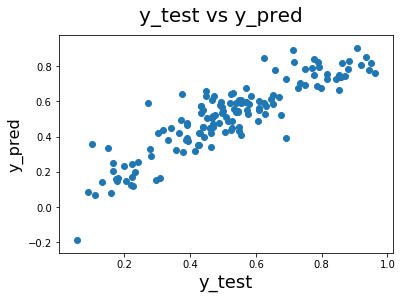

In [168]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   
plt.show()

#### $ R^{2}$ on both Test (fit) & Train Data :-
- ***84.3%*** 

#### Adjusted $ R^{2}$ on both Test (fit) & Train Data :-
- ***83.9%*** 

The difference in evaluation metric $ (R^2/Adjusted R^2) $ of training and test dataset is ***~1%***

We can see that the equation of our best fitted line is:

$ cnt = 0.2274  \times  yr - 0.0908  \times  holiday + 0.5372 \times atemp - 0.1679 \times hum - 0.1695 \times windspeed + 0.0637 \times august - 0.0433 \times Dec - 0.0469 \times Jan - 0.0464 \times Nov + 0.1094 \times Sep - 0.2391 \times L\_Snow\_rain - 0.0540 \times Mist\_cloudy + 0.0937 \times Summer + 0.1568 \times Winter + 0.2488$
